Une hypothèse `h(x)`, prend une entrée et nous donne la valeur de sortie estimée.

Cette hypothèse peut être aussi simple qu'une équation linéaire à une variable, .. jusqu'à une équation multivariée très compliquée et longue par rapport au type d'algorithme que nous utilisons (par exemple régression linéaire, régression logistique, etc.)

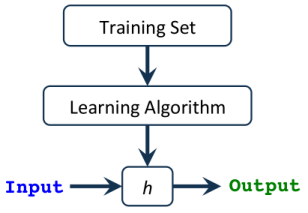

Nous allons essayer de trouver les **meilleurs paramètres** (aka **Thetas** ou **Weights**) qui nous donnent le **moins d'erreurs** dans la prédiction de la sortie. Nous appelons la fonction qui calcule cette erreur une **loss function**, et apparemment, notre objectif est de **minimiser l'erreur** afin d'obtenir la sortie la mieux prévue.

La relation entre la valeur du paramètre et son effet sur la fonction de coût (c'est-à-dire l'erreur) ressemble à une **courbe en cloche** (c'est-à-dire **quadratique**)

Si nous commençons à n'importe quel point de cette courbe et continuons à prendre la dérivée (c'est-à-dire la ligne tangente) de chaque point auquel nous nous arrêtons (_en supposant qu'il s'agit d'un problème univarié, sinon, si nous avons plusieurs caractéristiques, nous prenons la dérivée partielle_), on se retrouve a l'**Optima global**:

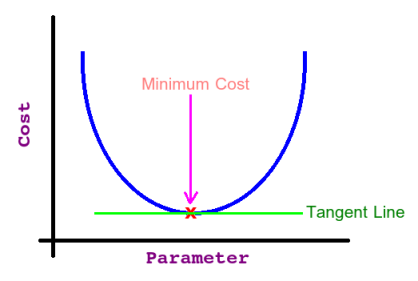

Si nous prenons la dérivée partielle au point de coût minimum (c'est-à-dire optima global), nous trouvons la **pente**(slope) de la tangente = $0$ (alors nous savons que nous avons atteint notre objectif).

Cela n'est valable que si nous avons une loss function _convexe_, mais si nous ne l'avons pas, nous pouvons nous retrouver bloqués à ce qu'on appelle les **Optima locaux**, comme sur cette fonction non convexe :

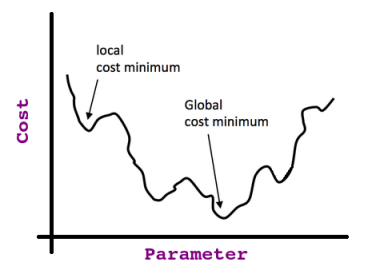

## Background

### Approximation linéaire

Étant donné une fonction, `f(x)`, nous pouvons trouver sa tangente en `x=a`. 

L'équation de la tangente `L(x)` est : `L(x)=f(a) + f'(a)(x-a)`.

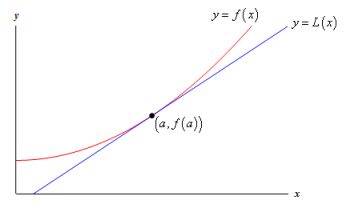

À partir de ce graphique, nous pouvons voir que près de `x=a`, la tangente et la fonction ont *presque* le même graphique. À l'occasion, nous utiliserons la tangente, `L(x)`, comme approximation de la fonction, `f(x)`, près de `x=a`. Dans ces cas, nous appelons la tangente `l'approximation linéaire` à la fonction en `x=a`.

### Approximation quadratique 

Identique à une approximation linéaire, mais cette fois nous avons affaire à une courbe où nous ne *pouvons pas* trouver le point proche de $0$ en utilisant uniquement la tangente : on doit utiliser une **parabole**

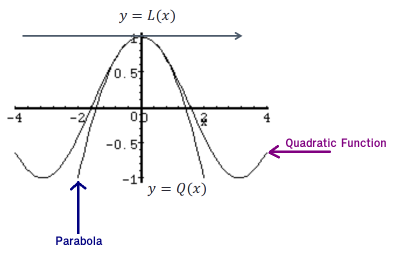

Pour ajuster une bonne parabole, la parabole et la fonction quadratique doivent avoir la **même valeur**, la **même dérivée première** ET la **même dérivée seconde**. La formule sera : `Qa(x) = f(a) + f'(a)(xa) + f''(a)(xa)2/2`

## Comparaison entre les méthodes

### 1. Méthode de Newton

#### `newton-cg` / `newton-cholesky`

Etape de descente de gradient en **x** : nous minimisons la fonction quadratique (c'est-à-dire la loss function).
                                                                                  
La méthode de Newton utilise en quelque sorte une **meilleure minimisation des fonctions quadratiques**. C'est mieux parce qu'elle utilise l'**approximation quadratique** (c'est-à-dire les **dérivées partielles premières `ET` secondes**).

C'est comme une descente de gradient torsadée avec le Hessian (*le Hessian est une matrice carrée de dérivées partielles du second ordre d'ordre `n X n`*).

De plus, l'interprétation géométrique de la méthode de Newton est qu'à chaque itération on approche `f(x)` par une fonction quadratique autour de $x_n$, puis on fait un pas vers le maximum/minimum de cette fonction quadratique (en dimension supérieure, cela peut aussi être un point de selle). Notez que si `f(x)` se trouve être une fonction quadratique, alors l'extremum exact est trouvé en une seule étape.

**Désavantages:**

* 1. **Coûteux** en calcul à cause de la matrice hessienne (c'est-à-dire les calculs des dérivées partielles secondes).
* 2. Elle attire vers les **points de selle(Saddle Points)** qui sont courants dans l'optimisation multivariable (c'est-à-dire un point sur lequel ses dérivées partielles sont en désaccord sur le point de savoir si cette entrée doit être un maximum ou un minimum).

`newton-cholesky` est un bon choix pour `n_samples >> n_features`, en particulier avec des features catégorielles one-hot encoded avec des catégories rares. Notez qu'il est limité à la **classification binaire** et à la **réduction one-versus-rest** pour la classification multiclasse. Sachez que l'utilisation de la mémoire de ce solveur a une dépendance quadratique sur `n_features` car il calcule explicitement la matrice Hessienne.

### 2 .Algorithme `Broyden–Fletcher–Goldfarb–Shanno` à mémoire limitée

#### `lbfgs`

Il s'agit d'un analogue de la méthode de Newton, mais ici la matrice hessienne est **approximée** à l'aide de mises à jour spécifiées par des évaluations de gradient (ou des évaluations de gradient approximatives). En d'autres termes, en utilisant l'estimation de la matrice hessienne inverse.

Le terme mémoire limitée signifie simplement qu'il ne stocke que quelques vecteurs qui représentent implicitement l'approximation.

Lorsque l'ensemble de données est **petit**, L-BFGS est relativement le meilleur par rapport aux autres méthodes, notamment parce qu'il économise beaucoup de mémoire, cependant, il y a quelques inconvénients "graves" tels que s'il n'est pas protégé, il peut ne pas converger vers n'importe quoi.

Note : Ce solveur est devenu le solveur par défaut dans sklearn LogisticRegression depuis la version 0.22, remplaçant LIBLINEAR.

### 3. Bibliothèque pour la grande classification linéaire 

#### `liblinear`

Il s'agit d'une **classification linéaire** qui prend en charge la **régression logistique** et les **machines à vecteurs de support linéaires**.

Le solveur utilise un algorithme de descente de coordonnées (**Coordinate Descent** ou **CD**) qui résout les problèmes d'optimisation en effectuant successivement une minimisation approximative le long de directions de coordonnées ou d'hyperplans de coordonnées.

`LIBLINEAR` est le gagnant du défi d'apprentissage à grande échelle ICML 2008. Il applique la sélection automatique des paramètres (alias **régularisation L1**) et il est recommandé lorsque vous avez un ensemble de données de grande dimension (recommandé pour résoudre des problèmes de classification à grande échelle)

**Désavantages:**

1. Il peut rester bloqué à un **point non stationnaire** (c'est-à-dire **non optimal**) si les courbes de niveau d'une fonction ne sont pas lisses.

2. Ne peut pas non plus fonctionner en parallèle.

3. Il ne peut pas apprendre un véritable modèle multinomial (multiclasse). Au lieu de cela, le problème d'optimisation est décomposé de manière `One-vs-Rest`, de sorte que des classificateurs binaires séparés sont entrainés pour toutes les classes.

### 4. Stochastic Average Gradient

#### `sag`

La méthode SAG optimise la somme d'un nombre fini de fonctions convexes lisses. Comme les méthodes de gradient stochastique (SG), le coût d'itération de la méthode SAG est indépendant du nombre de termes dans la somme. Cependant, en incorporant une mémoire des valeurs de gradient précédentes, la méthode SAG atteint un taux de convergence plus rapide que les méthodes black-box SG.

Il est plus rapide que les autres solveurs pour les grands ensembles de données lorsque le nombre d'échantillons et le nombre de features sont importants.

**Désavantages:**

1. Il ne prend en charge que la **pénalisation L2**.

2. bien que SAG soit adapté aux grands ensembles de données, avec un coût en mémoire de `O(N)`, il peut être moins pratique pour les très grands **N** (car l'évaluation de gradient la plus récente pour chaque fonction doit être conservé en mémoire). Une meilleure option serait `SVRG` [1](https://students.washington.edu/omids/Fa17.pdf) ou [2](https://arxiv.org/pdf/1407.0202v3.pdf) qui n'est malheureusement pas implémenté dans scikit-learn.

### 5. Stochastic Average Gradient Accelerated

#### `saga`

Le solveur SAGA est une variante de SAG qui prend également en charge la **pénalité L1 non lisse** (c'est-à-dire la **régularisation L1**). C'est donc le solveur de choix pour la **régression logistique multinomiale sparse**. Il a également une meilleure convergence théorique par rapport au SAG.

**Désavantages:**

1. SAGA est similaire à SAG en ce qui concerne le coût de la mémoire. C'est qu'il convient aux grands ensembles de données, mais dans les cas extrêmes où l'ensemble de données est très volumineux, le SVRG 1, 2 serait une meilleure option (malheureusement non implémenté dans scikit-learn)

**Note** : Selon Scikit Documentation : Le solveur SAGA est souvent le meilleur choix.

Veuillez noter que les attributs `Large` et `Small` utilisés dans Scikit-Learn et dans cette comparaison sont relatifs. cad, il n'y a pas de définition universelle unanime et précise des limites du jeu de données à considérer comme `grandes`, `trop grandes`, `petites`, `trop petites`...etc

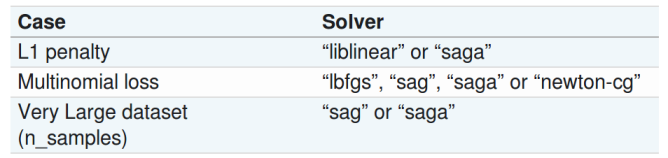

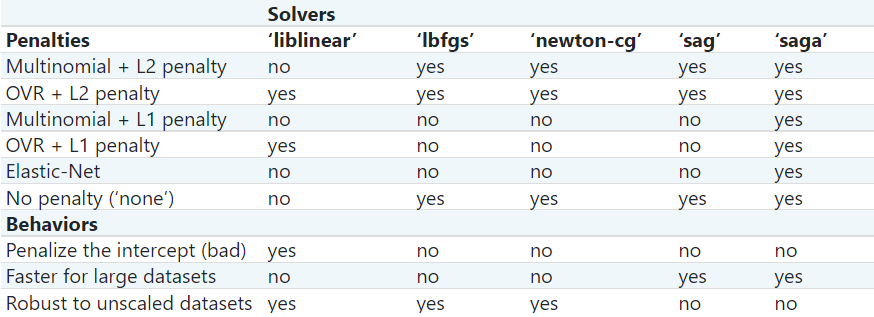

## Bonus

### Passage de la méthode de descente de gradient complete à SG puis à SAG puis à SAGA.

#### 1. Méthodes du gradient stochastique (SG).

SG tire parti du fait que les loss functions couramment utilisées peuvent être écrites comme une somme de loss functions par échantillon $f(w) = \frac{1}{n}\sum f_i(w)$, où w est le vecteur de poids optimisé. Le vecteur gradient s'écrit alors comme une somme de vecteurs gradient par échantillon : $\nabla f(w) = \frac{1}{n} \sum{\nabla f_i(w)}.$

Par exemple, l'erreur des moindres carrés a cette forme $\frac{1}{n} \sum{({x_i^T*w - y_i})^2}$ où $x_i$ sont les features du $i_ème$ échantillon et $y_i$ la $i_ème$ valeur de vérité terrain (cible, variable dépendante).

**Note** : La vérité terrain dans l'apprentissage automatique fait référence à la réalité que vous souhaitez modéliser avec votre algorithme d'apprentissage automatique supervisé. La vérité terrain est également connue comme la target pour le training ou la validation du modèle avec un ensemble de données étiqueté.

Et la loss de la régression logistique a cette forme (en notation [2](https://stats.stackexchange.com/questions/229645/why-there-are-two-different-logistic-loss-formulation-notations?noredirect=1&lq=1)) : 

$$\frac{1}{n}\sum_{j}^{n}log(1+e^{-y_j(x_j^T*w)})$$

#### 2. SG

L'idée principale du gradient stochastique qu'au lieu de calculer le gradient de toute la loss function, nous pouvons calculer le gradient de $f_i$, la loss function pour un seul échantillon aléatoire et la descente vers cette direction de gradient d'échantillon au lieu du gradient complet de $f(x)$. C'est beaucoup plus rapide. Le raisonnement est que le gradient d'échantillon choisi uniformément au hasard représente une **estimation non biaisée du gradient de la loss function totale**.

En pratique, la descente SG a un taux de convergence moins bon $O(1/\sqrt{k})$ que la descente de gradient complet $O(1/k)$ où $k$ est le nombre d'itérations. Mais il a une convergence plus rapide en termes de nombre de flops (opérations arithmétiques simples) car chaque itération nécessite le calcul d'un seul gradient au lieu de $n$. Il souffre également d'une variance élevée (en effet, nous ne pouvons pas nécessairement descendre lorsque nous choisissons un $i$ aléatoire, nous pouvons tout aussi bien monter)

#### 4. SAG

SAG atteint un taux de convergence de descente de gradient complet $O(1/k)$ sans rendre chaque itération plus coûteuse en flops par rapport à SG (ne serait-ce que par une constante).

L'algorithme SAG minimisant $f(w)$ est simple (pour les matrices denses de features).

À l'étape $0$, on choisit un point $w_0$ (en laissant de côté la façon dont vous le sélectionnez). Initialiser avec 0 cellules de mémoire $y_i$ pour enregistrer les gradients de $f_i$ à des étapes ultérieures.

À l'étape $k$, ont update les poids avec une moyenne des gradients décalés extraits des cellules de la mémoire (décalés car ils ne sont pas updated à chaque étape) :

$$w_{k+1} = w_k - \frac{\alpha_k}{n}\sum_{i}^{n}y_i$$

On choisit uniformément au hasard l'indice $i_k$ de $1..n$ et on update qu'une seule cellule de mémoire $y_{i_k}$ tel que:

$$
y_i = \left\{
    \begin{array}\\
        \nabla f_i(w_k)  & \mbox{si } \ i = i_k \\
        yi & \mbox{sinon } \ x = 0 
    \end{array}
\right.
$$
 
Il semble que nous calculions la somme totale des gradients décalés à chaque étape, mais la partie intéressante est que nous pouvons stocker la somme cumulée en tant que variable et la mettre à jour à moindre coût à chaque étape.

Nous pouvons réécrire un peu l'étape de mise à jour comme ceci :

$$w_{k+1} = w_k - \alpha_k(\frac{\nabla f_{i_k}(w_k) - y_{i_k}^k}{n} + \frac{1}{n}\sum_{i}^{n}y^k_i)$$

et voir que la somme $\frac{1}{n}\sum_{i}^{n}y^k_i$ est mise à jour par la quantité $\frac{\nabla f_{i_k}(w_k) - y_{i_k}^k}{n}$

Cependant, lorsque nous faisons cette étape de descente, nous n'allons plus dans le sens d'une estimation non biaisée du gradient complet à l'étape $k$. Nous allons dans le sens d'une estimation de la variance réduite (en partie parce que nous faisons un petit pas) mais biaisée.

Supposons que nous voulions utiliser des échantillons de Monte Carlo pour estimer $\mathbb{E}[X]$ et que nous puissions calculer efficacement $\mathbb{E}[Y]$ pour une autre variable aléatoire $Y$ fortement corrélée avec $X$. Une approche de **réduction de la variance** consiste à utiliser l'estimateur $θ$ suivant comme approximation de $\mathbb{E}[X]$ : $θ : = α(X − Y) + \mathbb{E}[Y]$ , pour un pas de taille $α ∈ [0, 1]$. Nous avons que $\mathbb{E}[θ]$ est une combinaison convexe de $\mathbb{E}[X]$ et $\mathbb{E}[Y] : \mathbb{E}[θ] = α\mathbb{E}[X] + (1 − α)\mathbb{E}[Y]$. L'approche standard de réduction de la variance utilise $α = 1$ et l'estimation est sans biais$ \mathbb{E}[θ = \mathbb{E}[X]$. La variance de $θ$ est : $Var(θ) = α^2*[Var(X) + Var(Y ) − 2 Cov(X, Y )]$, et donc si $Cov(X, Y)$ est assez grand, la variance de $θ$ est réduit par rapport à $X$, donnant son nom à la méthode. En faisant varier $α$ de $0$ à $1$, on augmente la variance de $θ$ vers sa valeur maximale (qui est généralement encore inférieure à celle de $X$) tout en diminuant son biais vers zéro.

Nous avons donc appliqué une approche de réduction de variance plus ou moins standard pour passer de **SG** à **SAG**. La constante de réduction de variance $α$ est égale à $1/n$ dans l'algorithme SAG. Si $Y$ est le $y^k_{i_k}$ choisi au hasard, $X$ est le $\nabla f_{i_k}(w_k)$, et la mise à jour est:

$$w_{k+1} = w_k - \alpha_k(\frac{\nabla f_{i_k}(w_k) - y_{i_k}^k}{n} + \frac{1}{n}\sum_{i}^ {n}y^k_i)$$

qui utilise l'estimation du gradient complet sous la forme $1/n*(X − Y) + \mathbb{E}[Y]$

Nous avons mentionné que SG souffre d'une variance élevée. Nous pouvons donc dire que **SAG** est **SG** avec une méthode intelligente de réduction de la variance qui lui est appliquée. On ne veux pas diminuer la signification des résultats,car choisir une variable aléatoire Y appropriée n'est pas simple. Maintenant, nous pouvons jouer avec les constantes de réduction de la variance.

#### SAGA

Si nous prenons la constante de réduction de la variance de 1, on utilise une estimation non biaisée du gradient complet : c'est l'idée principale de **SAGA**

On prend l'algorithme **SAG** et on applique une estimation non biaisée du gradient complet avec une constante de réduction de la variance $α = 1$.

L'étape de mise à jour s'agrandit et devient:

$$w_{k+1} = w_k - \alpha_k(\nabla f_{i_k}(w_k) - y_{i_k}^k + \frac{1}{n}\sum_{i}^{n}y^k_i)$$

En raison de l'absence de biais, la preuve de convergence devient simple et a de meilleures constantes que dans le cas **SAG**. Cela permet également une astuce supplémentaire permettant la **régularisation L1** : opérateur proximal.

#### Étape de descente de gradient proximal dans SAGA

Si on n'a pas besoin de **régularisation L1**, on pouvez ignorer cette partie car il existe toute une théorie mathématique sur les opérateurs proximaux.

L'opérateur proximal est une généralisation de la descente de gradient dans un certain sens. (L'opérateur est juste une fonction d'un vecteur dans un vecteur. Gradient est un opérateur par exemple)

$$prox_h(v) = argmin_u(h(u) + \frac{1}{2}|| uv ||^2)$$ où $h(u)$ est une fonction convexe continue.

En d'autres termes, cela revient à trouver le minimum de $h(u)$ mais aussi à être pénalisé pour s'être trop éloigné du point initial $v$. L'opérateur proximal est une fonction de $R^n$ à $R^n$ (vecteur à vecteur, tout comme le gradient) paramétrée par $h(x)$. Elle est non expansionnelle (c'est-à-dire que la distance entre $x$ et $y$ ne s'agrandit pas après l'application de l'opérateur proximal à $x$ et $y$). Son point fixe ($prox_h(x) = x$) est la solution du problème d'optimisation. L'opérateur proximal appliqué de manière itérative converge en fait vers son point fixe (bien que ce ne soit généralement pas vrai pour les opérateurs non expansifs, c'est-à-dire pas vrai pour la rotation). Ainsi, l'algorithme le plus simple pour trouver le minimum à l'aide de l'opérateur proximal consiste simplement à appliquer l'opérateur plusieurs fois $x_{k+1} = prox_{\alpha h}(x_k)$. Et ceci est similaire à la descente de gradient dans un certain sens. Voici pourquoi :

Supposons une fonction convexe différentiable $h$ et au lieu de la descente de gradient, on update une mise à jour similaire d'Euler vers l'arrière : $x_{k+1} = x_k - \alpha \nabla h(x_{k+1})$. Cette mise à jour peut être vue comme une mise à jour de l'opérateur proximal $x_{k+1} = prox_{\alpha h}(x_k)$, puisque pour l'opérateur proximal nous devons trouver $x_{k+1}$ minimisant $\alpha h(x_{k+ 1}) + \frac{1}{2}||x_{k+1} -x_k||^2 ou trouver x_{k+1}$ tel que $\alpha \nabla h(x_{k+1}) + x_{k+1} - x_k = 0 donc x_{k+1} = x_k - \alpha \nabla h(x_{k+1})$

Ok pourquoi même envisager de changer un problème de minimisation par un autre (le calcul de l'opérateur proximal est un problème de minimisation à l'intérieur d'un problème de minimisation). La réponse est que pour la plupart des loss functions courantes, l'opérateur proximal a soit une forme fermée, soit une méthode d'approximation efficace. Prenez le régularisateur L1. Son opérateur proximal est appelé opérateur à seuil souple et il a une forme simple

Revenons maintenant à **SAGA**. Supposons que l'on minimise $g(x) + h(x)$ où $g(x)$ est une fonction convexe lisse et $h(x)$ est une fonction convexe non lisse (par exemple régularisation L1) mais pour laquelle on est capable de calculer efficacement la fonction proximale opérateur. Ainsi, l'algorithme pourrait d'abord faire une étape de descente de gradient pour $g$ pour réduire $g$, puis appliquer l'opérateur proximal de $h$ au résultat pour réduire $h$. C'est l'astuce supplémentaire dans SAGA et c'est ce qu'on appelle la **descente de gradient proximal**.

#### SAG et SAGA sont bien adaptés aux très grands ensembles de données

Supposition : un ensemble de données très volumineux signifie probablement que la matrice de features est sparse (a beaucoup de 0).

Considérons maintenant une loss function paramétrée linéairement $f(w) = \frac{1}{n} \sum{f_i(w)} = \frac{1}{n} \sum{l_i(x_i^Tw)}$. Chaque terme de somme a une forme spéciale $f_i(w) = l_i(x_i^Tw)$. $l_i$ est une fonction d'une seule variable. Notez que la cross entropy loss(entropie croisée) et la least square loss(moindres carrés) ont cette forme. Par règle de chaîne, on obtient:

$$\nabla f_i(w) = l'_i(x_i^Tw) \times x_i = \begin{bmatrix} {x_i^1l'_i(x_i^Tw) \\  x_i^2l'_i(x_i^Tw) \\ ... \\ x_i^{p-1}l'_i(x_i^Tw) \\ x_i^nl'_i(x_i^Tw)}\end{bmatrix}$$

Il est donc évident que le gradient est également sparse.

**SAG** (et **SAGA**) appliquent une astuce astucieuse pour les matrices sparses. L'idée est que le vecteur de poids n'a pas besoin d'être mis à jour dans chaque index à chaque étape. La mise à jour peut être sautée pour les indices du vecteur de pondération qui sont clairsemés dans l'échantillon choisi aléatoirement courant $x_i$ à l'étape $k$.

Il existe d'autres astuces astucieuses dans **SAG** et SAGA (papiers originaux [1](https://arxiv.org/pdf/1309.2388.pdf) et [2](https://arxiv.org/pdf/1407.0202.pdf)